In [1]:
import pandas as pd 
from parsing import parseGSEA

outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.5,statThreshold=0.1)

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at:Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 86484.56it/s]


Parsing Complete.
~~~~~~ </parseGSEA> ~~~~~~


In [2]:
## Outputs object is a dataclass object containing all of the information requried for downstream analysis
## The network dataframe
print(outputs.label)
outputs.dataframe.head(5)

Example_data\GSEA_2m/edb


,node1,node2,jaccard_index,draw_edge,condition
0,GOCC_PRERIBOSOME,GOBP_RIBOSOME_BIOGENESIS,0.340625,0,Example_data\GSEA_2m/edb
1,GOCC_PRERIBOSOME,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,0.002625,0,Example_data\GSEA_2m/edb
2,GOCC_PRERIBOSOME,GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS,0.126506,0,Example_data\GSEA_2m/edb
3,GOCC_PRERIBOSOME,REACTOME_MRNA_SPLICING,0.003195,0,Example_data\GSEA_2m/edb
4,GOCC_PRERIBOSOME,GOCC_SMALL_SUBUNIT_PROCESSOME,0.669643,1,Example_data\GSEA_2m/edb


In [3]:
## The network metadata
print(outputs.label)
outputs.metadata.head(5)

Example_data\GSEA_2m/edb


,node,nes,fdr,upregulated?,condition
0,GOCC_PRERIBOSOME,-2.3769,0.0000,0,Example_data\GSEA_2m/edb
1,GOBP_RIBOSOME_BIOGENESIS,-2.1993,0.0064,0,Example_data\GSEA_2m/edb
2,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,-2.1959,0.0051,0,Example_data\GSEA_2m/edb
3,GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS,-2.1434,0.0113,0,Example_data\GSEA_2m/edb
4,REACTOME_MRNA_SPLICING,-2.1407,0.0094,0,Example_data\GSEA_2m/edb


In [4]:
## The normalised enrichments and false discovery rates for genesets in this experiment
print(outputs.label)
outputs.statistics[:5]

Example_data\GSEA_2m/edb


[('GOCC_PRERIBOSOME', -2.3769, 0.0, 'Example_data\\GSEA_2m/edb'),
 ('GOBP_RIBOSOME_BIOGENESIS', -2.1993, 0.0064, 'Example_data\\GSEA_2m/edb'),
 ('REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
  -2.1959,
  0.0051,
  'Example_data\\GSEA_2m/edb'),
 ('GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS',
  -2.1434,
  0.0113,
  'Example_data\\GSEA_2m/edb'),
 ('REACTOME_MRNA_SPLICING', -2.1407, 0.0094, 'Example_data\\GSEA_2m/edb')]

In [5]:
## The gene lookup tables for each of the genesets
print(outputs.label)
pd.Series(outputs.lookup).head(5)


Example_data\GSEA_2m/edb


GOCC_PRERIBOSOME                                            [2810004N23Rik, Aatf, Bms1, Bop1, Bysl, Casp8,...
GOBP_RIBOSOME_BIOGENESIS                                    [1700009N14Rik, 2810004N23Rik, 9930104L06Rik, ...
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA    [Aaas, Acin1, Alyref, Aqr, BC005624, Bcas2, Bu...
GOBP_RIBOSOMAL_LARGE_SUBUNIT_BIOGENESIS                     [9930104L06Rik, Bop1, Brix1, Cinp, Ddx18, Ddx2...
REACTOME_MRNA_SPLICING                                      [Acin1, Alyref, Aqr, BC005624, Bcas2, Bud13, B...
dtype: object

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at:Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 89534.50it/s]


Parsing Complete.

~~~~~~ </parseGSEA> ~~~~~~


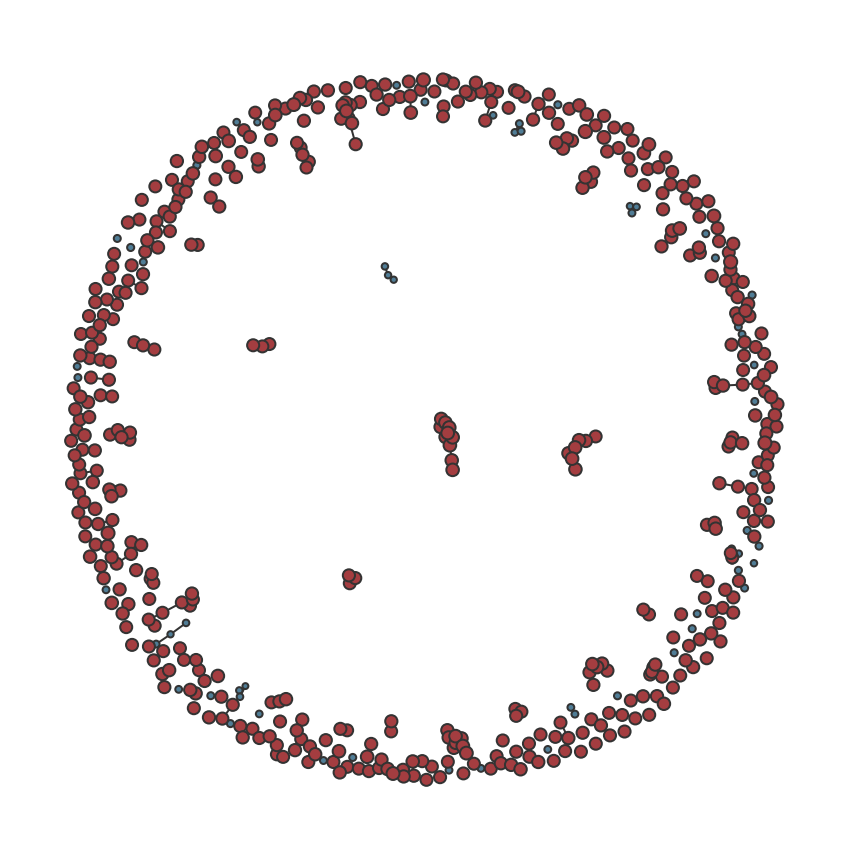

In [2]:
from parsing import parseGSEA
from plotting import plotGSEA

outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.45,statThreshold=0.1)
plotGSEA.iterativePlotting(outputs,save=False)

In [1]:
from parsing import parseGSEA
from analysis import analyseGSEA

outputs = parseGSEA(filepath='./Example_data').fileAccessor(jaccardFilter=0.45,statThreshold=0.1)
semanticEnrichment, clusters, clusterNES = analyseGSEA().clusterInformation(outputs)

~~~~~~ parseGSEA ~~~~~~

Retrieving data from Example_data.
EDB folder found at: Example_data\GSEA_2m/edb.
Parsing data at destinations.
Parsing: Example_data\GSEA_2m/edb
PARSED - .gmt file.
PARSED - .edb file.
PARSED - Significant genesets.
Computing Jaccard indices.


142311it [00:01, 89845.45it/s]


Parsing Complete.

~~~~~~ </parseGSEA> ~~~~~~
~~~~~~ analyseGSEA ~~~~~~
 
Creating instance of graph network.
Extracting subgraphs.
Calculating relative enrichment of geneset annotations.
Calculating mean normalised enrichment scores.
Analysis complete.

~~~~~~ </analyseGSEA> ~~~~~~


In [3]:
clusters

[(74,
  {'GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERACTION_WITH_HOST',
   'GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_SYMBIOTIC_INTERACTION',
   'GOBP_ENTRY_INTO_HOST',
   'GOBP_MODULATION_BY_SYMBIONT_OF_ENTRY_INTO_HOST',
   'GOBP_MOVEMENT_IN_HOST',
   'GOBP_NEGATIVE_REGULATION_OF_VIRAL_LIFE_CYCLE',
   'GOBP_REGULATION_OF_BIOLOGICAL_PROCESS_INVOLVED_IN_SYMBIOTIC_INTERACTION'}),
 (86,
  {'GOBP_CELL_CYCLE_CHECKPOINT_SIGNALING',
   'GOBP_MITOTIC_CELL_CYCLE_CHECKPOINT_SIGNALING',
   'GOBP_MITOTIC_CELL_CYCLE_PHASE_TRANSITION',
   'GOBP_NEGATIVE_REGULATION_OF_CELL_CYCLE_PROCESS',
   'GOBP_NEGATIVE_REGULATION_OF_MITOTIC_CELL_CYCLE_PHASE_TRANSITION',
   'GOBP_REGULATION_OF_MITOTIC_CELL_CYCLE_PHASE_TRANSITION'}),
 (235,
  {'REACTOME_AMPLIFICATION_OF_SIGNAL_FROM_THE_KINETOCHORES',
   'REACTOME_CELL_CYCLE_CHECKPOINTS',
   'REACTOME_MITOTIC_METAPHASE_AND_ANAPHASE',
   'REACTOME_MITOTIC_PROMETAPHASE',
   'REACTOME_MITOTIC_SPINDLE_CHECKPOINT',
   'REACTOME_RESOLUTION_OF_SISTER_CHROMATID_COHESION',
   'REACT